### Some Tips for the Homework

1. Error handline with Try/Except.  In one of your homework problems you need to test whether 2 input vectors have the same dimension.  There's probably a few ways you can do this, but the one you should learn is the try/except method. Here's a simple example (your code will likely compare len(a) to len(b) or something similar.

In [1]:
while True:
    try:
        x = int(input("Please enter a number: "))
        break
    except ValueError:
        print("Oops!  That was no valid number.  Try again...")

print(f"Success, you entered integer {x}")

Please enter a number: bob
Oops!  That was no valid number.  Try again...
Please enter a number: 3.
Oops!  That was no valid number.  Try again...
Please enter a number: -4
Success, you entered integer -4


For the Mandelbrot set problem, the minimum problem statement asks just to print in black and white, but that's too easy for such advanced numericists as you all (graduate students and all).  So do plot it in color - it's quite beautiful, so you'll impress your friends.  

Here's a simple example that uses matplotlib imshow.  You can adapt for the Mandelbrot problem.  

In [2]:
%matplotlib inline

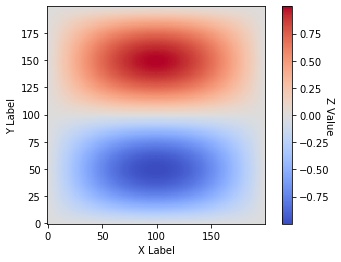

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 1 * np.pi, 200)   # you won't need these lines for Mandelbrot problem
y = np.linspace(0, 2 * np.pi, 200)
x, y = np.meshgrid(x,y)

z = -np.sin(x)*np.sin(y)

ax = plt.imshow(z,cmap=cm.coolwarm,origin='lower')
cbar = fig.colorbar(ax)  # you won't need colorbar for this, but in general it's useful
#cbar.ax.get_yaxis().labelpad=15        # this ofsets the color bar if needed
cbar.ax.set_ylabel('Z Value',rotation=270)

plt.xlabel('X Label')
plt.ylabel('Y Label')

plt.show()

#### Newman 3.3:

There's also Newman problem 3.3 which reads in a file stm.txt (from the author's website), and asks you to plot it.  I didn't assign it, but here's the code and output:

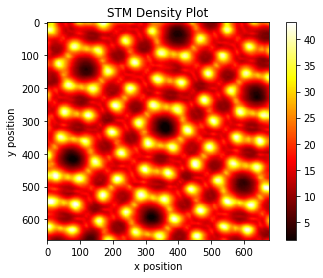

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.loadtxt("stm.txt"))
plt.hot()
plt.colorbar()
plt.title("STM Density Plot")
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

#### Newman Problem 3.8:  Linear least squares

Often fit a straight line to data

$$y = mx + c$$

What determines the 'best fit'?  Typical to use the method of least squares.

Minimized the sum of the squares of the differences between our fit line and the y values of the data.

$$\chi^2 = \sum_{i=1}^N(mx_i + c - y_i)^2$$

We find the minimum by differentiating with respect to both $m$ and $c$ and setting the derivatives to zero which gives

$$ m\sum x_i^2 + c\sum x_i - \sum x_i y_i = 0$$
$$ m\sum x_i + cN - \sum y_i = 0$$

Define

$$E_x = \frac{1}{N}\sum x_i$$
$$E_y = \frac{1}{N}\sum y_i$$
$$E_{xx} = \frac{1}{N}\sum x_i^2$$
$$E_{xy} = \frac{1}{N}\sum x_iy_i$$

Then
$$mE_{xx} + cE_x = E_{xy}$$
$$mE_x + c = E_y$$

Solving these equations simultaneously gives:

$$m = \frac{E_{xy}- E_xE_y}{E_{xx}- E_x^2}, \quad c = \frac{E_{xx}E_y - E_xE_{xy}}{E_{xx}- E_x^2}$$


Slope = 4.0882e-15
Estimated h = 6.5493e-34


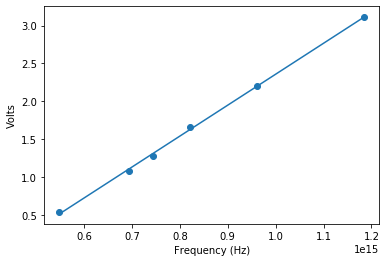

In [9]:
# Milikan Least Squares
# Reads data file containing Millikan's Volts vs Freq data for photoelectric effect
# V = (h/e) nu + phi

import numpy as np
import matplotlib.pyplot as plt

# Read and plot the data
x, y = np.loadtxt("millikan.txt",unpack=True)
plt.scatter(x,y)

# Perform the fit

n = len(x)
Ex = 0.0
Ey = 0.0
Exx = 0.0
Exy = 0.0

for i in range(n):
    Ex += x[i]
    Ey += y[i]
    Exx += x[i]*x[i]
    Exy += x[i]*y[i]

Ex /= n
Ey /= n
Exx /= n
Exy /= n
denom = Exx - Ex*Ex
m = (Exy - Ex*Ey)/denom
c = (Exx*Ey - Ex*Exy)/denom
print(f"Slope = {m:.4e}")

h_est = m * 1.602e-19
print(f"Estimated h = {h_est:.4e}")

# Calculate and plot the fitted line
yfit = np.empty(n)
for i in range(n):
    yfit[i] = m*x[i] + c

plt.plot(x,yfit)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Volts")
plt.show()

### Chapter 4: Accuracy and Speed

In [10]:
# Examples
0.1 + 0.2

0.30000000000000004

In [17]:
0.1 + 0.2 - 0.3
print(repr(0.2),repr(2/10.))
for i in range(10):
    print(repr(i*0.1))

0.2 0.2
0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


The representation of floating point (64 bit) numbers is given by 

$$ f = (-1)^S\times M \times 2^E$$

Where 
* $S$ is the sign bit (S=0 -> +, S=1 -> -)
* $M$ is the mantissa (53 bits which gives approx 16 decimal places, a number between $\frac{1}{2} \le M \lt 1$
* $E$ is the exponent (an integer, using 10 bits).

Example: 0.2

In [18]:
import math as ma
ma.frexp(0.2)

(0.8, -2)

And this checks out: $0.8 \times 2^{-2} = 0.8 / 4 = 0.2$

In [19]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

Note max and min values that can be represented.  

In general, because of "represtation error" or "roundoff error", you don't want to test for equality of floats. Instead, check for agreement within some tolerance:

In [20]:
# This is 'bad'.  Note if we just tested for 'while t != 1.0' it would be an infinite loop!

t = 0
while t != 1.0 and t < 1.5:  
    print(repr(t))
    t += 0.1

0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999
1.0999999999999999
1.2
1.3
1.4000000000000001


In [21]:
# Better to test for agreement within some tolerance:

t = 0
epsilon = 1.e-9
while abs(t-1.0) > epsilon:  
    print(repr(t))
    t += 0.1
    

0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999


In [22]:
sys.int_info

sys.int_info(bits_per_digit=30, sizeof_digit=4)

This is the default int size, but python expands to allow you to represent any arbitrarily large integer as long as your computer has memory

In [24]:
from math import factorial
myint = factorial(1000)
print(myint)
type(myint)

4023872600770937735437024339230039857193748642107146325437999104299385123986290205920442084869694048004799886101971960586316668729948085589013238296699445909974245040870737599188236277271887325197795059509952761208749754624970436014182780946464962910563938874378864873371191810458257836478499770124766328898359557354325131853239584630755574091142624174743493475534286465766116677973966688202912073791438537195882498081268678383745597317461360853795345242215865932019280908782973084313928444032812315586110369768013573042161687476096758713483120254785893207671691324484262361314125087802080002616831510273418279777047846358681701643650241536913982812648102130927612448963599287051149649754199093422215668325720808213331861168115536158365469840467089756029009505376164758477284218896796462449451607653534081989013854424879849599533191017233555566021394503997362807501378376153071277619268490343526252000158885351473316117021039681759215109077880193931781141945452572238655414610628921879602238389714760

int

Note: you can use infinity!

In [25]:
infinity = float('inf')
print(infinity, infinity/1.e9, infinity*infinity, infinity*0)

inf inf inf nan


where 'nan' is "not a number" . 

#### Program Speed

So we now know computers are not infinitely accurate.  We could use 128-bit floats available from numpy, but then this will run at 1/4 the speed (since twice as many bits).


In [26]:
import numpy as np

a128 = np.float128(27/7)

In [27]:
print(repr(a128))
np.finfo(a128)

3.8571428571428572063


finfo(resolution=1.0000000000000000715e-18, min=-1.189731495357231765e+4932, max=1.189731495357231765e+4932, dtype=float128)

Speed:

In your homework, you will find that a million operations takes about a second or less, but a billion ops will take a few minutes.  Managable, but probably the limit of your patience.

Consider Newman Ex 4.2, Quantum Harmonic Osciator at finite temp



In [32]:
from math import exp

terms = 100000000


beta = 1/100
S = 0.0
Z = 0.0
for n in range(terms):
    E = n + 0.5
    weight = exp(-beta*E)
    S += weight*E
    Z += weight
    
print(S/Z)

100.00083333194436
